1. Предобработка данных:
   - Очистите данные от пропусков и аномалий.




In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [109]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### пропущенные слова только в целевой колонке Sleep Disorder

In [111]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [112]:
# заменим в колонке Sleep Disorder n/a на None
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

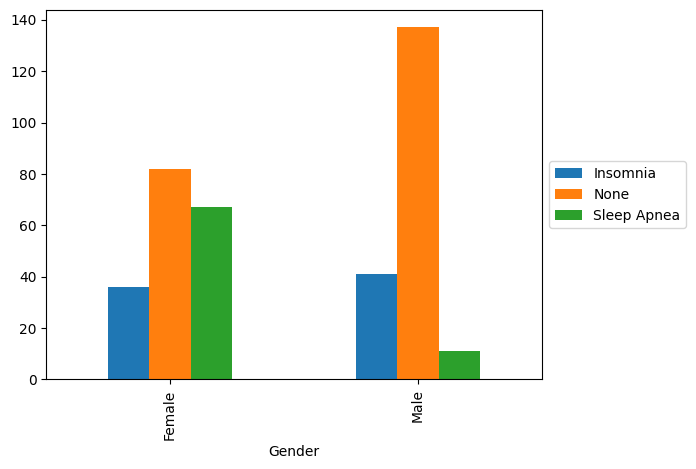

In [113]:
# проверим распределение ключевого признака по полам
pd.crosstab(df["Gender"],df["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

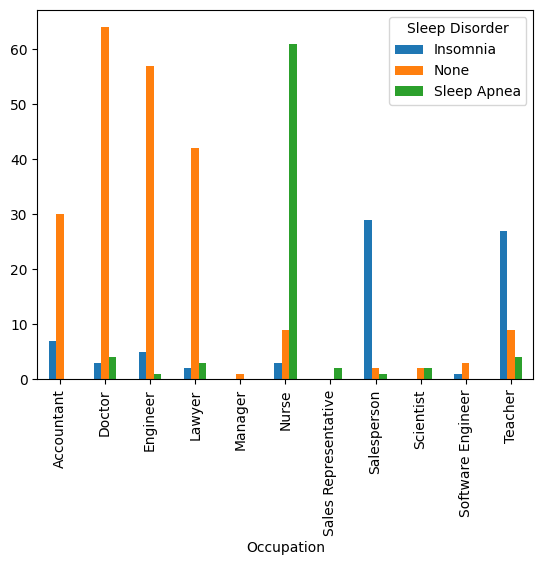

In [114]:
# # проверим распределение ключевого признака по должностям
pd.crosstab(df["Occupation"],df["Sleep Disorder"]).plot(kind="bar")
plt.show()

In [115]:
# удалим незначимый признак
df.drop("Person ID",axis=1,inplace=True)

In [116]:
# разделим давление Blood Pressure на две колонки
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df.drop(columns="Blood Pressure" , axis=1 ,inplace=True)

In [117]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


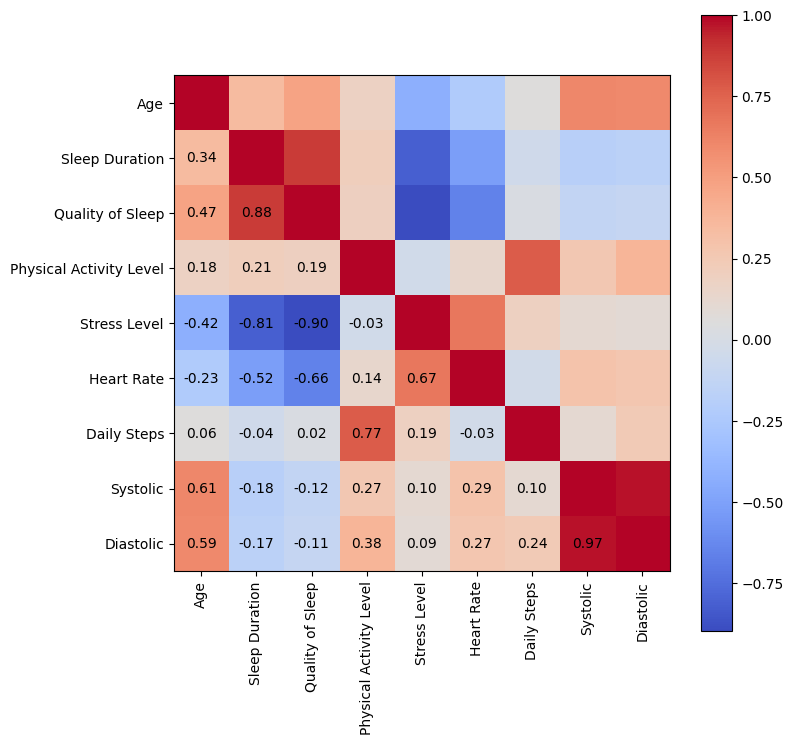

In [118]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

#### согласно матрицы корреляции особое влияние на сон оказывает физическая активность

   - Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

In [119]:
# используем Label Encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,Overweight,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,Normal,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,Normal,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,Obese,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,Obese,85,3000,2,140,90


In [120]:
# закодируем избыточный вес BMI Category вручную, т.к. эта категориальная переменная ранжирована
def weight_encoder(weight):
    if weight== 'Normal':
        return 0
    if weight== 'Overweight':
        return 1
    else:
        return 2

df['BMI Category'] = df['BMI Category'].apply(weight_encoder)

In [121]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,1,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [122]:
df.corr(numeric_only=True)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.267642,0.217105,-0.014509,-0.253415,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.288686,-0.225606,0.057973,0.232000,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.495085,0.043928,-0.105877,-0.169800,0.518561,0.521835
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.254461,-0.516455,-0.039533,0.177552,-0.180406,-0.166570
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.260303,-0.659865,0.016791,0.179592,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.054279,0.136971,0.772723,0.433214,0.265416,0.382651
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.115520,0.670026,0.186829,-0.036058,0.102818,0.091811
BMI Category,-0.267642,0.288686,0.495085,-0.254461,-0.260303,0.054279,0.115520,1.000000,0.449015,-0.127457,0.028721,0.475782,0.497273
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.449015,1.000000,-0.030309,0.205987,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,-0.127457,-0.030309,1.000000,0.342098,0.103342,0.241986


#### зависимость целевой переменной от физической активности остается, таким образом кодирование не повлияло на матрицу корреляции 
необходимо отметить высокую степень корреляции между: Quality of Sleep/Sleep Duration (88%) и Stress Level/Sleep Duration (81%) и Physical Activity Level/Daily Steps (77%) и  Stress Level/Heart Rate (66%)

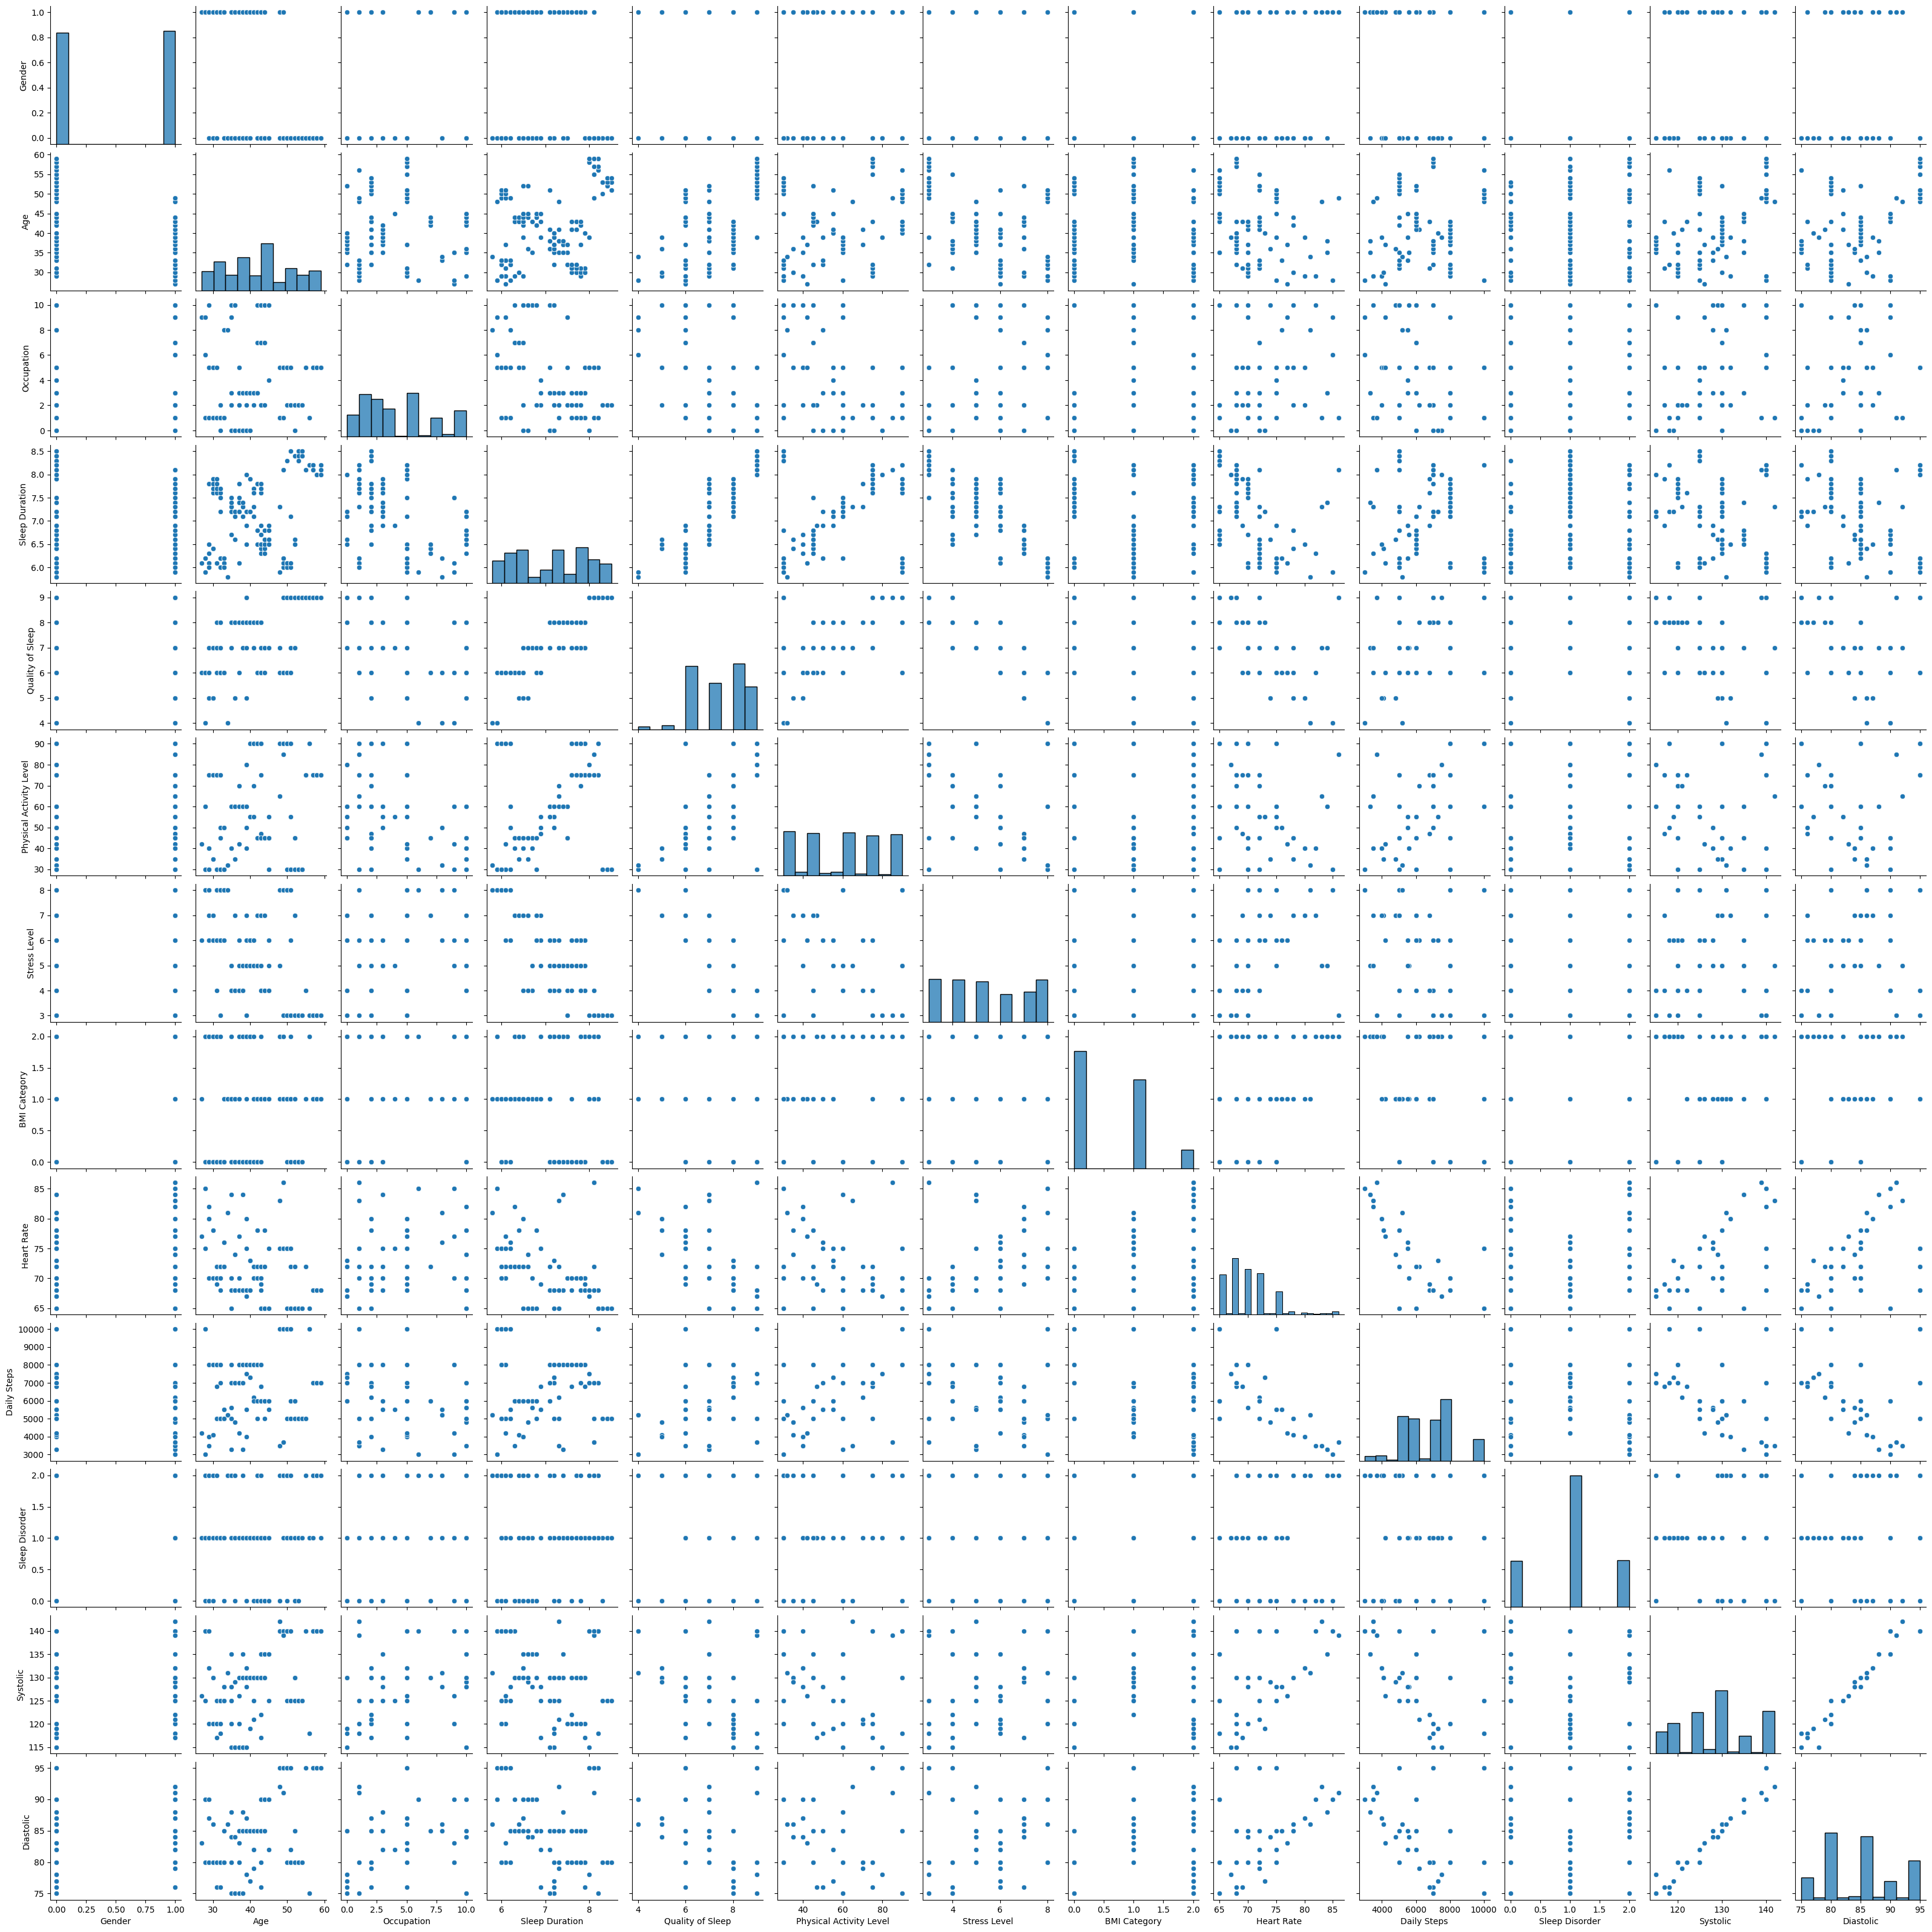

In [126]:
import seaborn as sns
sns.pairplot(df)

#### pairplot показывает дополнительные зависимости: Systolic(Diastolic)/Daily Steps и Systolic(Diastolic)/Daily Steps

2. Генерация новых признаков:
   - Создайте комбинированные признаки, которые могут помочь улучшить модель.
   - Используйте полиномиальные признаки для числовых переменных.



3. Отбор признаков:
   - Примените несколько методов отбора признаков (например, RFE, SelectKBest).
   - Сравните качество модели до и после отбора признаков.



4. Подбор гиперпараметров:
   - Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
   - Оцените, как изменение гиперпараметров влияет на качество предсказаний.
